<a href="https://colab.research.google.com/github/cazathoth/tfm/blob/main/tfm_jvasquez_v1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#descarga librerias.
install.packages("tidyverse")
install.packages("arrow")
install.packages("lubridate")
install.packages("corrplot")
install.packages('openxlsx')
install.packages('devtools')
install.packages('caret')
devtools::install_github('catboost/catboost', subdir = 'catboost/R-package')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’






── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpQzh04c/remotes3dd5669a2c0/catboost-catboost-55a8200/catboost/R-package/DESCRIPTION’ ... OK
* preparing ‘catboost’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘catboost_1.2.7.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#cargo librerias a utilizar.
library("tidyverse")
library("arrow")
library("lubridate")
library ("corrplot")
library('openxlsx')
library('caret')
library("catboost")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp


corrplot 0.95 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [3]:
#creo directorio y descargo dataset con datos de urgencias respiratorias
dir.create("descargas")
url <- "https://datos.gob.cl/dataset/606ef5bb-11d1-475b-b69f-b980da5757f4/resource/ae6c9887-106d-4e98-8875-40bf2b836041/download/at_urg_respiratorio_semanal.parquet"
nombre_temporal <- "descargas/at_urg_respiratorio_semanal.parquet"
download.file(url, nombre_temporal)

In [4]:
#Descargo datos meteorologicos- temperatura
url <- "https://raw.githubusercontent.com/cazathoth/data/9ed2ff302d64b81e79eab693e77d12f805ed65ba/MERGE_XXXX_DiarioTs_.csv"
nombre_temporal <- "descargas/MERGE_XXXX_DiarioTs_.csv"
download.file(url, nombre_temporal)

In [5]:
#Descargo datos meteorologicos- precipitaciones
url <- "https://raw.githubusercontent.com/cazathoth/data/43bad08be793c38c993d524d182dcb2597e14714/MERGE_DiarioRR.csv"
nombre_temporal <- "descargas/MERGE_DiarioRR.csv"
download.file(url, nombre_temporal)

In [6]:
#Descargo zip datos meteorologicos- humedad
url <- "https://github.com/cazathoth/data/raw/69c13d02f49cd04ee16ab8063f872e2aa9b2632a/MERGE_Humedad.zip"
nombre_temporal <- "descargas/MERGE_Humedad.zip"
download.file(url, nombre_temporal)
#Descomprimo archivo zip
unzip("/content/descargas/MERGE_Humedad.zip", exdir = "/content/descargas/")

In [7]:
#Descargo datos material particulado
url <- "https://raw.githubusercontent.com/cazathoth/data/6b00e8ef9b16a1802825e7914f998a6dd5e8f486/MERGE_MP.csv"
nombre_temporal <- "descargas/MERGE_MP.csv"
download.file(url, nombre_temporal)

In [8]:
# Creo data frame urgencias y filtro por comuna de Santiago, La Serena y Concepción, luego cargo los datos
df_urgr_esp_semanal <- read_parquet("descargas/at_urg_respiratorio_semanal.parquet", col_select = c ('EstablecimientoCodigo','ComunaCodigo', COMUNA='ComunaGlosa', 'Anio', NuSemana='SemanaEstadistica','OrdenCausa','Causa','NumTotal'))
#Aqui estan todas las causas consideradas. La #3 es un total.
df_urgr_esp_semanal %>% select(OrdenCausa, Causa)%>%distinct()%>%arrange(OrdenCausa)

OrdenCausa,Causa
<int>,<chr>
3,TOTAL CAUSAS SISTEMA RESPIRATORIO
4,IRA Alta (J00-J06)
5,Influenza (J09-J11)
6,Neumonía (J12-J18)
7,Bronquitis/bronquiolitis aguda (J20-J21)
8,Crisis obstructiva bronquial (J40-J46)
9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)"
10,"Covid-19, Virus no identificado U07.2"
11,"Covid-19, Virus identificado U07.1"


In [9]:
df_urgr_esp_semanal <- df_urgr_esp_semanal %>% filter (ComunaCodigo %in% c(4101, 8101, 13101) & OrdenCausa ==3)
df_urgr_esp_semanal <- df_urgr_esp_semanal %>% rename(COMUNA = ComunaGlosa, NuSemana = SemanaEstadistica)
head(df_urgr_esp_semanal,3)

EstablecimientoCodigo,ComunaCodigo,COMUNA,Anio,NuSemana,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
200150,8101,Concepción,2015,35,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,563
111195,13101,Santiago,2018,2,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,66
118809,8101,Concepción,2016,13,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,179


In [10]:
#Cargo data frame temperatura y le cargo datos
#df_datos_temperatura <- read.csv("descargas/MERGE_XXXX_DiarioTs_.csv", header= TRUE, sep=";")
df_datos_temperatura <- read_delim("descargas/MERGE_XXXX_DiarioTs_.csv", delim=";",col_select = c('CodigoNacional','momento','MediaCli_Valor','Maxima_Valor','Minima_Valor'))
head(df_datos_temperatura,3)

Rows: 74539 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): momento
dbl (4): CodigoNacional, MediaCli_Valor, Maxima_Valor, Minima_Valor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CodigoNacional,momento,MediaCli_Valor,Maxima_Valor,Minima_Valor
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
290004,01-01-1954 12:00:00,16.5,20.6,12.3
290004,02-01-1954 12:00:00,17.1,20.4,13.9
290004,03-01-1954 12:00:00,15.1,20.0,10.2


In [11]:
#Cargo data frame humedad y le cargo datos
df_datos_Humedad <- read.csv("descargas/MERGE_Humedad.csv", header= TRUE, sep=";")
head(df_datos_Humedad,3)

,CodigoNacional,momento,HR_Valor
,<int>,<chr>,<dbl>
1,290004,01-01-1954 10:00:00,NA
2,290004,01-01-1954 11:00:00,NA
3,290004,01-01-1954 12:00:00,NA


In [12]:
#Cargo data frame precipitaciones y le cargo datos
#df_datos_Precip <- read.csv("descargas/MERGE_DiarioRR.csv", header= TRUE, sep=";")
df_datos_Precip <- read_delim("descargas/MERGE_DiarioRR.csv", delim=";",col_select = c('CodigoNacional','momento','Total_Valor'))
head(df_datos_Precip,3)

Rows: 66161 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): momento
dbl (2): CodigoNacional, Total_Valor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CodigoNacional,momento,Total_Valor
<dbl>,<chr>,<dbl>
290004,01-01-1954 12:00:00,0
290004,02-01-1954 12:00:00,0
290004,03-01-1954 12:00:00,0


In [13]:
#Cargo data frame material particulado y le cargo datos
#df_datos_mp25 <- read.csv("descargas/MERGE_MP.csv", header= TRUE, sep=";")
df_datos_mp25 <- read_delim("descargas/MERGE_MP.csv", delim=";",col_select = c('COMUNA', momento = 'FECHA(YYYYMMDD)', registrosValidados='Registros validados', registrosPreliminares='Registros preliminares', registrosNoValidados='Registros no validados' ))
 df_datos_mp25 <-df_datos_mp25%>%unite(totalMP25, c(registrosValidados,registrosPreliminares, registrosNoValidados), na.rm = TRUE)
 df_datos_mp25$totalMP25 <- as.double(df_datos_mp25$totalMP25)
head(df_datos_mp25,3)

Rows: 18476 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): COMUNA
dbl (4): Registros validados, Registros preliminares, Registros no validados...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


COMUNA,momento,totalMP25
<chr>,<dbl>,<dbl>
Concepcion,20090812,390.2810
Concepcion,20090813,68.5317
Concepcion,20090814,319.4660


In [14]:
#formateo fechas en material particulado 2.5.
df_datos_mp25$momento <- format(as.Date(as.character(df_datos_mp25$momento),format="%Y%m%d"), format="%d-%m-%Y")
#formateo fechas en temperaturas.
df_datos_temperatura$momento<- format(as.Date(df_datos_temperatura$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")
#formateo fechas en precipitaciones
df_datos_Precip$momento<- format(as.Date(df_datos_Precip$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")
#formateo fechas en humedad
df_datos_Humedad$momento<- format(as.Date(df_datos_Humedad$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")

In [15]:
#Limpio filas con NA en todos los dataframe y chequeo contando posibles NA
df_urgr_esp_semanal <- na.omit(df_urgr_esp_semanal)
df_datos_temperatura <- na.omit(df_datos_temperatura)
#df_datos_Precip <- na.omit(df_datos_Precip)
df_datos_Humedad <- na.omit(df_datos_Humedad)
#df_datos_mp25 <- na.omit(df_datos_mp25)
sum(!complete.cases(df_urgr_esp_semanal))
sum(!complete.cases(df_datos_temperatura))
sum(!complete.cases(df_datos_Precip))
sum(!complete.cases(df_datos_Humedad))
sum(!complete.cases(df_datos_mp25))
#sum(rowSums(is.na(df_datos_temperatura)) == 2)



[1] 0

[1] 0

[1] 134

[1] 0

[1] 1183

In [16]:
# agrupo urgencias respiratorias por año, semana y comuna y sumo el total de urgencias para la comuna.
df_urgr_esp_semanal <-df_urgr_esp_semanal %>% group_by (COMUNA, Anio, NuSemana) %>% summarise(NumTotalUrg = sum(NumTotal, na.rm = TRUE)) %>%filter(Anio > 2013 & Anio < 2024)
df_urgr_esp_semanal <- as.data.frame(df_urgr_esp_semanal)
df_urgr_esp_semanal$COMUNA[df_urgr_esp_semanal$COMUNA == "La Serena"] <- "LaSerena"
df_urgr_esp_semanal$COMUNA[df_urgr_esp_semanal$COMUNA == "Concepción"] <- "Concepcion"
head(df_urgr_esp_semanal,3)

`summarise()` has grouped output by 'COMUNA', 'Anio'. You can override using
the `.groups` argument.


,COMUNA,Anio,NuSemana,NumTotalUrg
,<chr>,<int>,<int>,<int>
1,Concepcion,2014,1,574
2,Concepcion,2014,2,965
3,Concepcion,2014,3,763


In [17]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame temperatura
semana<- epiweek(dmy(df_datos_temperatura$momento))
ano <- year(dmy(df_datos_temperatura$momento))
difTemp <- df_datos_temperatura$Maxima_Valor-df_datos_temperatura$Minima_Valor
df_datos_temperatura <- cbind(df_datos_temperatura, NuSemana = semana)
df_datos_temperatura <- cbind(df_datos_temperatura, Anio = ano)
df_datos_temperatura <- cbind(df_datos_temperatura, difTemp = difTemp)
head(df_datos_temperatura,3)

,CodigoNacional,momento,MediaCli_Valor,Maxima_Valor,Minima_Valor,NuSemana,Anio,difTemp
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,01-01-1954,16.5,20.6,12.3,52,1954,8.3
2,290004,02-01-1954,17.1,20.4,13.9,52,1954,6.5
3,290004,03-01-1954,15.1,20.0,10.2,1,1954,9.8


In [18]:
# Obtengo la media y mediana, de la temperatura para cada semana en cada año.
df_datos_temperatura_semanal <- df_datos_temperatura %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(medianaClim = median(MediaCli_Valor, na.rm = TRUE),  difMaxMin = median(difTemp, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_temperatura_semanal <- as.data.frame (df_datos_temperatura_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_temperatura_semanal <- df_datos_temperatura_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_temperatura_semanal,3)



`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,medianaClim,difMaxMin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,17.6,7.8
2,290004,2014,2,17.4,7.5
3,290004,2014,3,17.8,6.9


In [19]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame humedad
semana<-epiweek(dmy(df_datos_Humedad$momento))
ano <- year(dmy(df_datos_Humedad$momento))
df_datos_Humedad <- cbind(df_datos_Humedad, NuSemana = semana)
df_datos_Humedad <- cbind(df_datos_Humedad, Anio = ano)
head(df_datos_Humedad,3)

,CodigoNacional,momento,HR_Valor,NuSemana,Anio
,<int>,<chr>,<dbl>,<dbl>,<dbl>
5113,290004,06-01-1963,95,2,1963
5114,290004,06-01-1963,93,2,1963
5115,290004,06-01-1963,89,2,1963


In [20]:
# Obtengo la media y mediana, de la temperatura para cada semana en cada año.
df_datos_Humedad_semanal <- df_datos_Humedad %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(Mediana_HR_Valor = median(HR_Valor, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_Humedad_semanal <- as.data.frame (df_datos_Humedad_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_Humedad_semanal <- df_datos_Humedad_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_Humedad_semanal,3)

`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,Mediana_HR_Valor
,<int>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,76.5
2,290004,2014,2,81.5
3,290004,2014,3,72.5


In [21]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame precipitaciones
semana<-epiweek(dmy(df_datos_Precip$momento))
ano <- year(dmy(df_datos_Precip$momento))
df_datos_Precip <- cbind(df_datos_Precip, NuSemana = semana)
df_datos_Precip <- cbind(df_datos_Precip, Anio = ano)
head(df_datos_Precip,3)

,CodigoNacional,momento,Total_Valor,NuSemana,Anio
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,290004,01-01-1954,0,52,1954
2,290004,02-01-1954,0,52,1954
3,290004,03-01-1954,0,1,1954


In [22]:
# Agrupo y obtengo la suma de precipitaciones para cada semana en cada año.
df_datos_Precip_semanal <- df_datos_Precip %>% group_by (CodigoNacional,Anio, NuSemana) %>% summarise(Total_Valor_semPP = sum(Total_Valor, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_Precip_semanal <- as.data.frame (df_datos_Precip_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_Precip_semanal <- df_datos_Precip_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_Precip_semanal,3)

`summarise()` has grouped output by 'CodigoNacional', 'Anio'. You can override
using the `.groups` argument.


,CodigoNacional,Anio,NuSemana,Total_Valor_semPP
,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,0
2,290004,2014,2,0
3,290004,2014,3,0


In [23]:
#obtengo n° de semana de las fechas de mediciones (momento) y agrego columna al data frame mp25
semana<-epiweek(dmy(df_datos_mp25$momento))
ano <- year(dmy(df_datos_mp25$momento))
df_datos_mp25 <- cbind(df_datos_mp25, NuSemana = semana)
df_datos_mp25 <- cbind(df_datos_mp25, Anio = ano)
head(df_datos_mp25,3)

,COMUNA,momento,totalMP25,NuSemana,Anio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Concepcion,12-08-2009,390.2810,32,2009
2,Concepcion,13-08-2009,68.5317,32,2009
3,Concepcion,14-08-2009,319.4660,32,2009


In [24]:
# Agrupo y obtengo la suma de precipitaciones para cada semana en cada año.
df_datos_mp25_semanal <- df_datos_mp25 %>% group_by (COMUNA,Anio, NuSemana) %>% summarise(Total_Valor_semMP25 = sum(totalMP25, na.rm = TRUE))
#Convierto agrupación con media y mediana a data frame
df_datos_mp25_semanal <- as.data.frame (df_datos_mp25_semanal)
#filtro por todo aquellos años >= a 2014
df_datos_mp25_semanal <- df_datos_mp25_semanal %>% filter(Anio > 2013 & Anio < 2024)
head(df_datos_mp25_semanal,3)

`summarise()` has grouped output by 'COMUNA', 'Anio'. You can override using
the `.groups` argument.


,COMUNA,Anio,NuSemana,Total_Valor_semMP25
,<chr>,<dbl>,<dbl>,<dbl>
1,Concepcion,2014,1,48.20000
2,Concepcion,2014,2,73.69997
3,Concepcion,2014,3,72.09999


In [25]:
nrow(df_urgr_esp_semanal)
#write.csv (df_urgr_esp_semanal, "prueba.csv")
nrow(df_datos_temperatura_semanal)
#write.csv (df_datos_temperatura_semanal, "prueba2.csv")
nrow(df_datos_Precip_semanal)
nrow(df_datos_Humedad_semanal)
nrow(df_datos_mp25_semanal)

[1] 1572

[1] 1572

[1] 1572

[1] 1572

[1] 1572

In [26]:
df_variable <-merge(df_datos_temperatura_semanal, df_datos_Humedad_semanal, by = c("CodigoNacional","Anio","NuSemana"))
df_variable <- merge(df_variable, df_datos_Precip_semanal, by = c("CodigoNacional","Anio","NuSemana"))
head(df_variable,10)

,CodigoNacional,Anio,NuSemana,medianaClim,difMaxMin,Mediana_HR_Valor,Total_Valor_semPP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,290004,2014,1,17.6,7.8,76.5,0.0
2,290004,2014,10,15.8,8.4,82.0,0.0
3,290004,2014,11,14.9,6.6,84.0,0.0
4,290004,2014,12,14.3,6.1,86.5,0.2
5,290004,2014,13,14.4,4.2,85.5,0.6
6,290004,2014,14,14.2,7.7,80.0,0.0
7,290004,2014,15,14.1,8.9,77.0,0.0
8,290004,2014,16,12.8,5.4,83.0,0.0
9,290004,2014,17,13.2,5.0,84.0,0.2


In [27]:
df_variable <- df_variable %>% mutate(COMUNA = ifelse(CodigoNacional == 290004, "LaSerena", ifelse (CodigoNacional == 360019, "Concepcion", ifelse (CodigoNacional == 330020, "Santiago", NA))))


In [28]:
df_variable <- merge(df_variable, df_datos_mp25_semanal, by = c("COMUNA","Anio","NuSemana"))
df_variable <- merge(df_variable, df_urgr_esp_semanal, by = c("COMUNA","Anio","NuSemana"))
df_final <-df_variable %>% select(-CodigoNacional)
df_final$COMUNA <- as.factor(df_final$COMUNA)
head(df_final,10)

,COMUNA,Anio,NuSemana,medianaClim,difMaxMin,Mediana_HR_Valor,Total_Valor_semPP,Total_Valor_semMP25,NumTotalUrg
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Concepcion,2014,1,16.75,13.6,58.0,0.0,48.20000,574
2,Concepcion,2014,10,15.20,11.2,76.5,0.4,21.40000,938
3,Concepcion,2014,11,15.80,9.9,80.0,12.8,47.90000,1270
4,Concepcion,2014,12,15.30,12.0,72.0,0.8,86.30000,1702
5,Concepcion,2014,13,13.70,4.4,81.0,52.8,112.39000,1450
6,Concepcion,2014,14,12.80,9.2,84.0,0.0,99.09999,1480
7,Concepcion,2014,15,12.00,8.4,86.0,5.8,93.99997,1317
8,Concepcion,2014,16,12.70,11.2,73.0,0.0,93.79999,1353
9,Concepcion,2014,17,12.60,10.9,90.5,1.6,114.50000,1400


In [30]:
df_datos_mp25_semanal %>% filter(Total_Valor_semMP25 == 0 & Anio == 2016)

COMUNA,Anio,NuSemana,Total_Valor_semMP25
<chr>,<dbl>,<dbl>,<dbl>
Concepcion,2016,41,0
Concepcion,2016,42,0
Concepcion,2016,43,0
Concepcion,2016,44,0
Concepcion,2016,45,0


In [31]:
summary(df_final)

        COMUNA         Anio         NuSemana     medianaClim      difMaxMin    
 Concepcion:524   Min.   :2014   Min.   : 1.0   Min.   : 5.00   Min.   : 2.40  
 LaSerena  :524   1st Qu.:2016   1st Qu.:14.0   1st Qu.:11.50   1st Qu.: 7.10  
 Santiago  :524   Median :2018   Median :27.0   Median :13.90   Median : 9.50  
                  Mean   :2018   Mean   :26.7   Mean   :14.31   Mean   :10.68  
                  3rd Qu.:2021   3rd Qu.:40.0   3rd Qu.:16.90   3rd Qu.:13.72  
                  Max.   :2023   Max.   :53.0   Max.   :25.40   Max.   :23.20  
 Mediana_HR_Valor Total_Valor_semPP Total_Valor_semMP25  NumTotalUrg    
 Min.   :31.00    Min.   :  0.000   Min.   :  0.00      Min.   :  34.0  
 1st Qu.:71.00    1st Qu.:  0.000   1st Qu.: 68.00      1st Qu.: 534.8  
 Median :80.00    Median :  0.000   Median : 98.46      Median : 973.0  
 Mean   :76.34    Mean   :  6.573   Mean   :120.32      Mean   :1031.9  
 3rd Qu.:85.00    3rd Qu.:  2.850   3rd Qu.:152.00      3rd Qu.:1494.0  
 M

In [32]:
# Obtengo cantidad de urgencias por año y region
df_resumen <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(Total = sum(NumTotalUrg, na.rm = TRUE))
  head(df_resumen)


`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


Anio,COMUNA,Total
<dbl>,<fct>,<int>
2014,Concepcion,78922
2014,LaSerena,65343
2014,Santiago,46232
2015,Concepcion,84479
2015,LaSerena,68130
2015,Santiago,48973


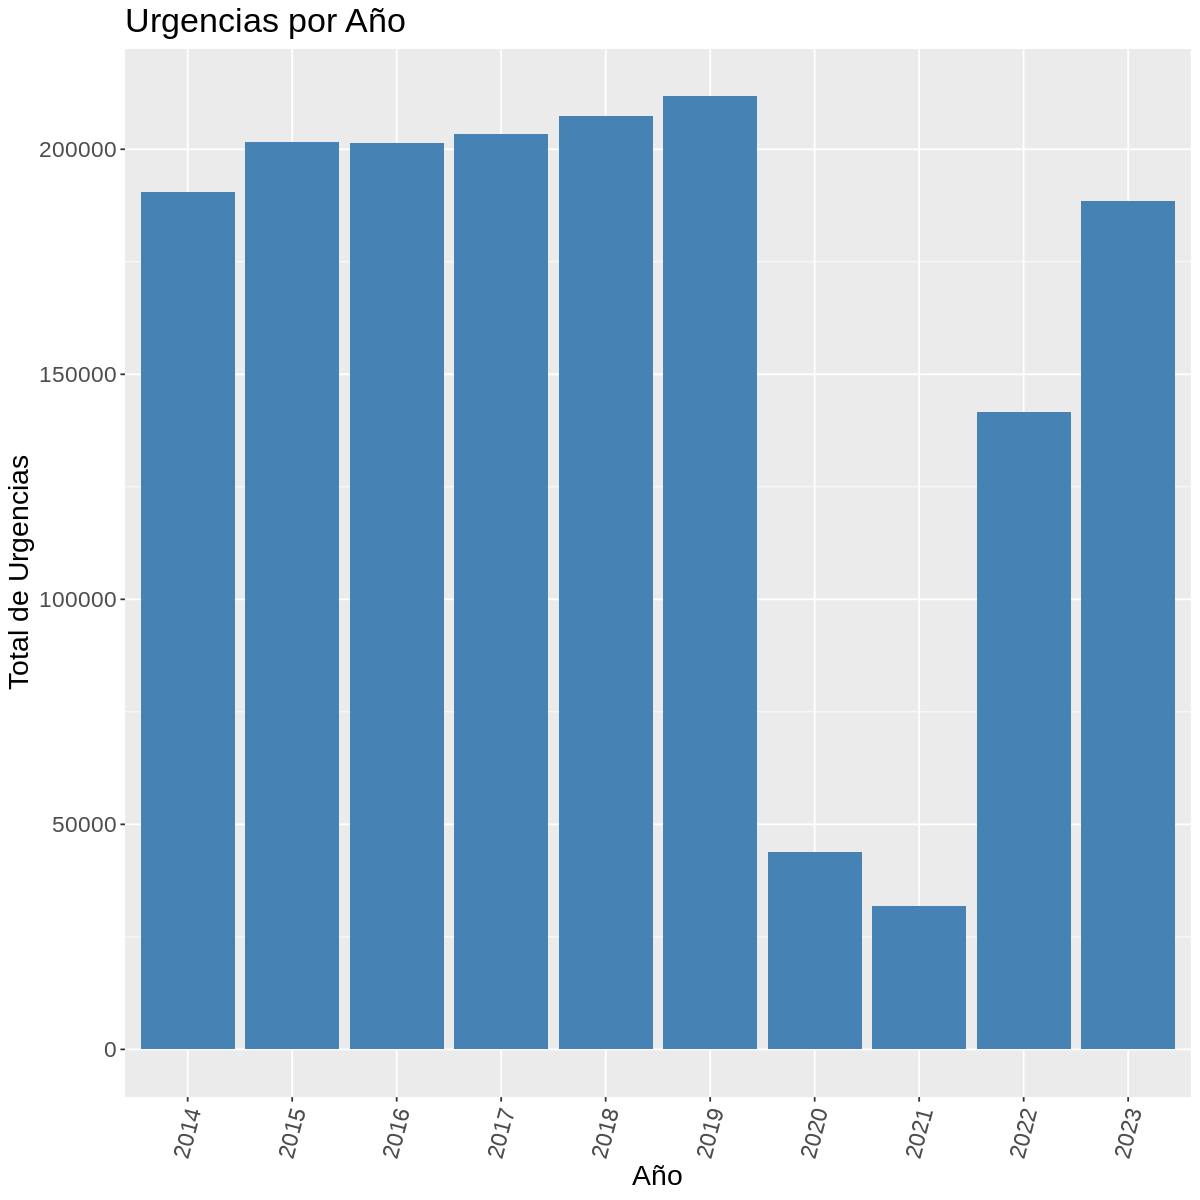

In [33]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_final, aes(x = factor(Anio), y = NumTotalUrg)) +
  geom_col(fill = "steelblue") +  # Use geom_col for bar plots
   # geom_text(aes(label = NumTotalUrg), vjust = -0.5, size = 4) + # Add labels
  labs(x = "Año", y = "Total de Urgencias", title = "Urgencias por Año") +
  theme(text = element_text (size=17),axis.text.x = element_text(angle = 75, vjust = .5))


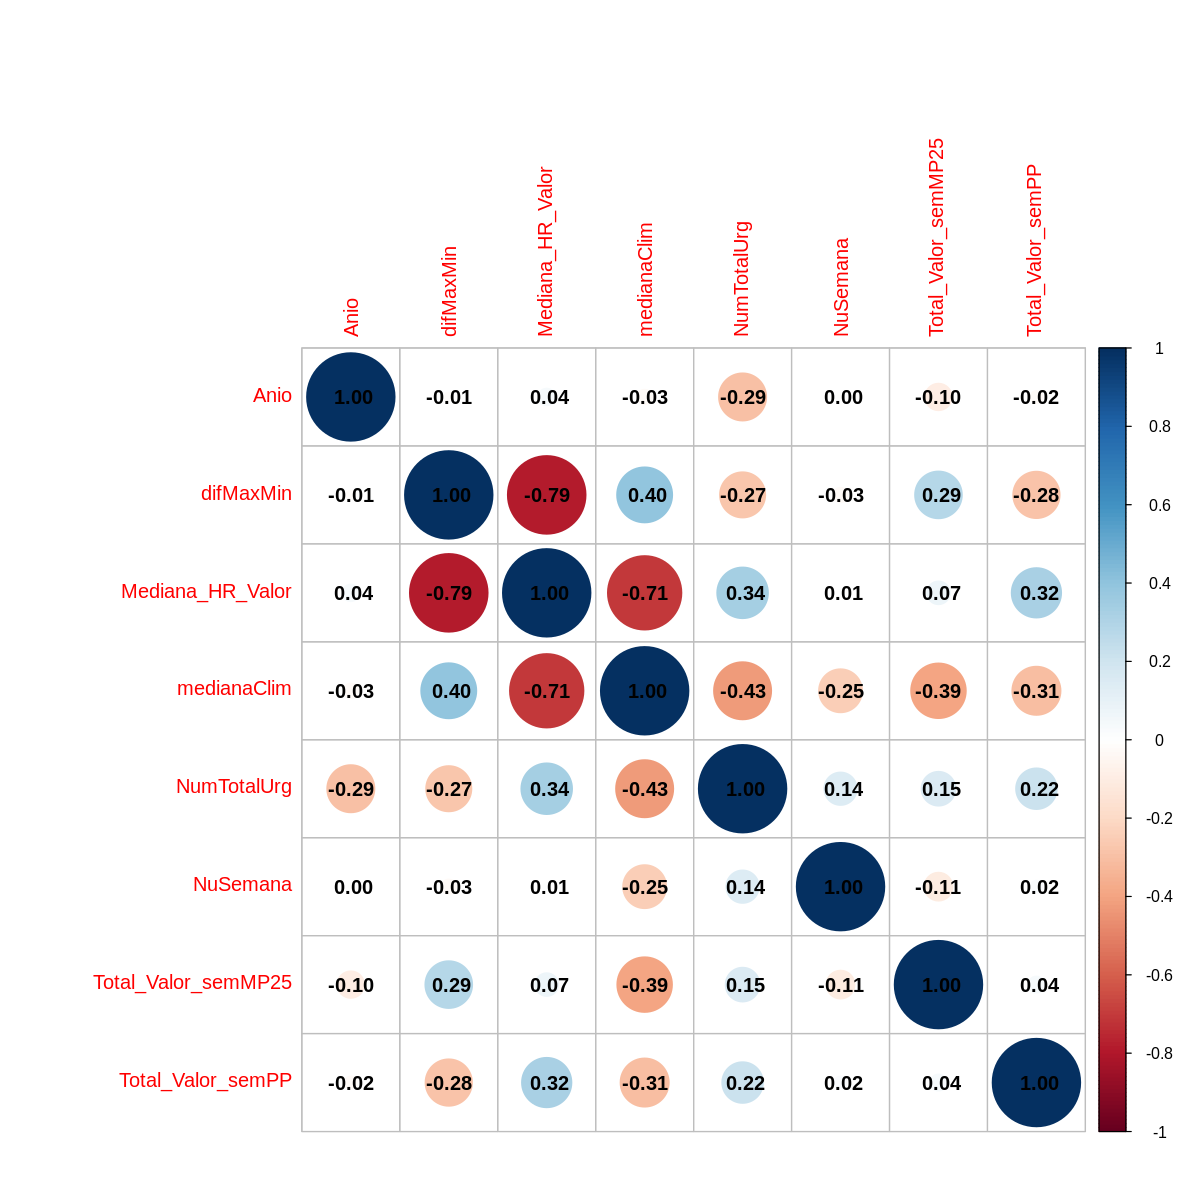

In [34]:
correlation_matrix <- cor(df_final[, sapply(df_final, is.numeric)])
corrplot(correlation_matrix, method = 'circle', order = 'alphabet', addCoef.col ='black')

In [35]:
write.xlsx(df_final, "df_consolidadofinal.xlsx")

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


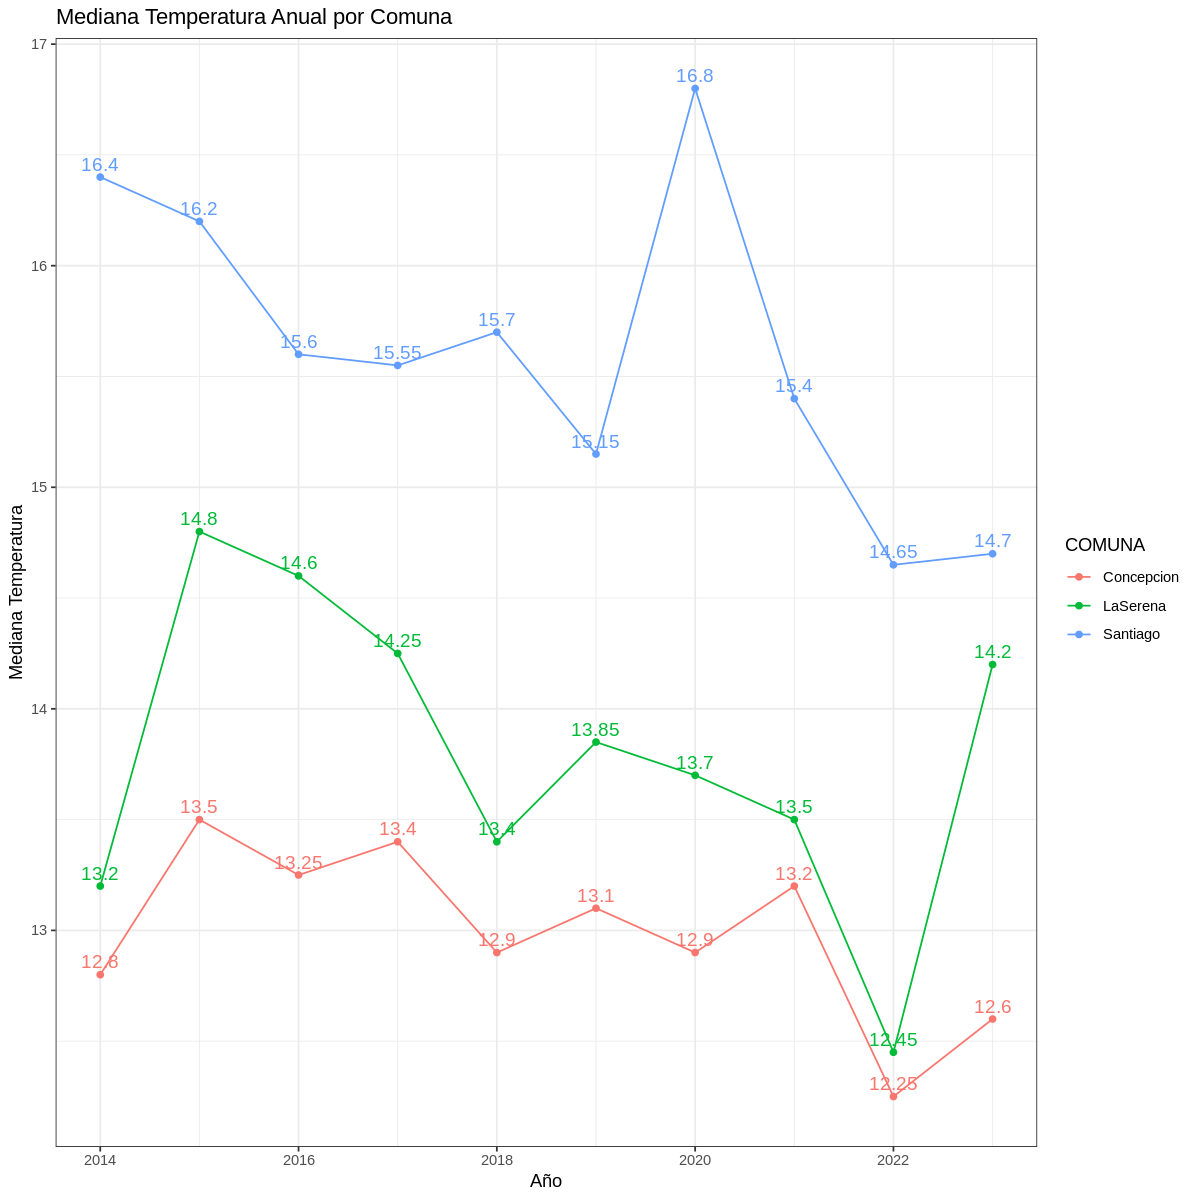

In [56]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_medianaClim = median(medianaClim, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = mediana_medianaClim, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_medianaClim, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "Mediana Temperatura", title = "Mediana Temperatura Anual por Comuna") +
  theme_bw()

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


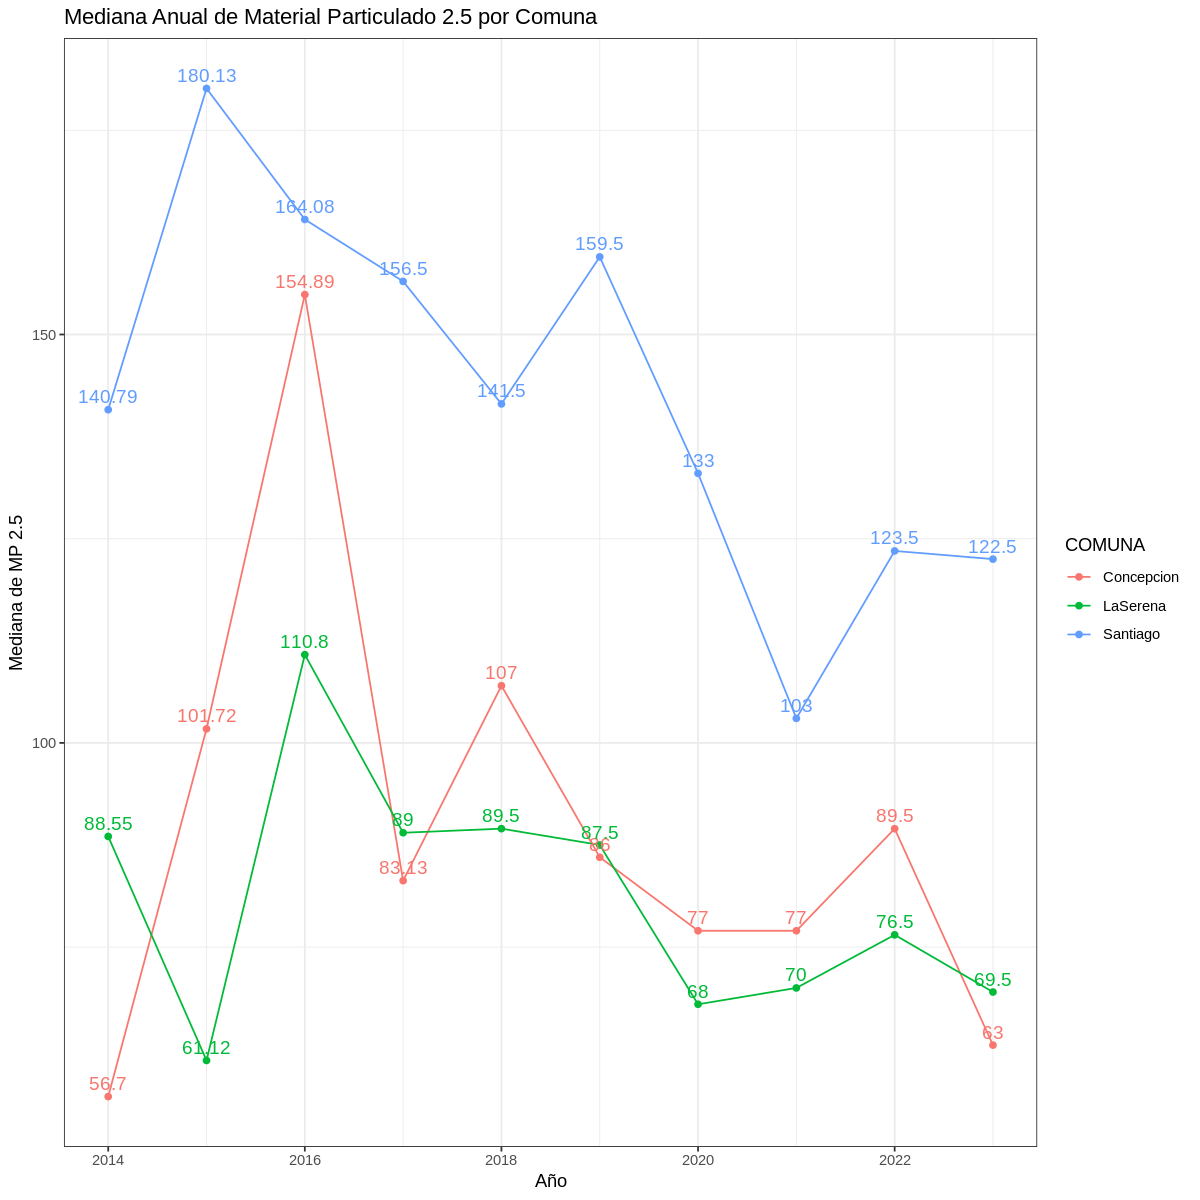

In [57]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_mp25 = median(Total_Valor_semMP25, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = mediana_mp25, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_mp25, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "Mediana de MP 2.5", title = "Mediana Anual de Material Particulado 2.5 por Comuna") +
  theme_bw()

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


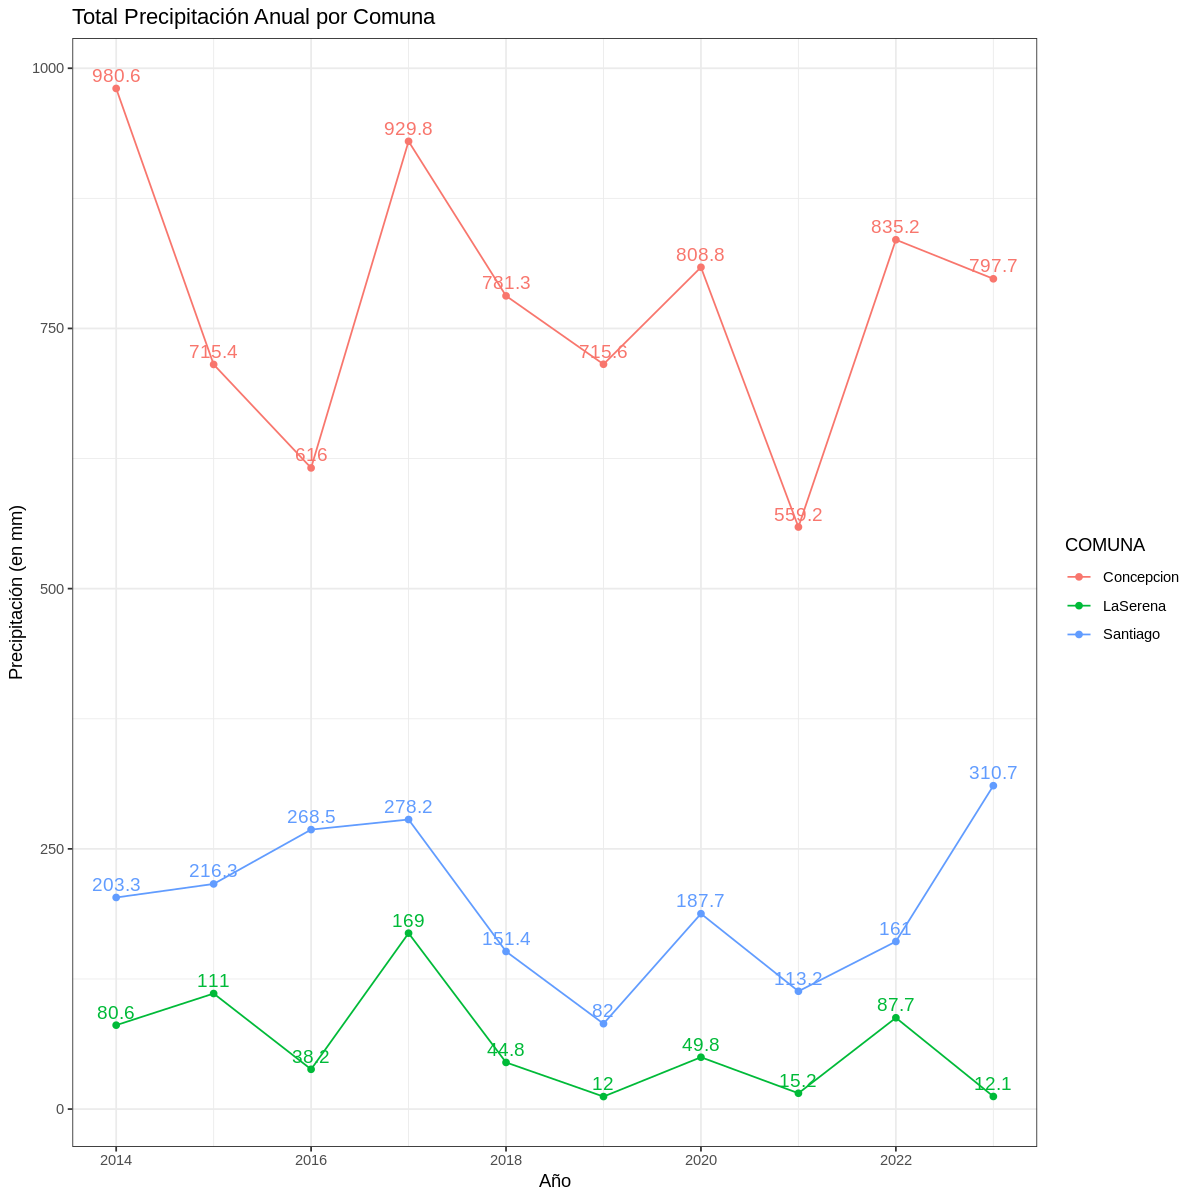

In [59]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(sum_pp = sum(Total_Valor_semPP, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = sum_pp, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(sum_pp, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "Precipitación (en mm)", title = "Total Precipitación Anual por Comuna") +
  theme_bw()

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


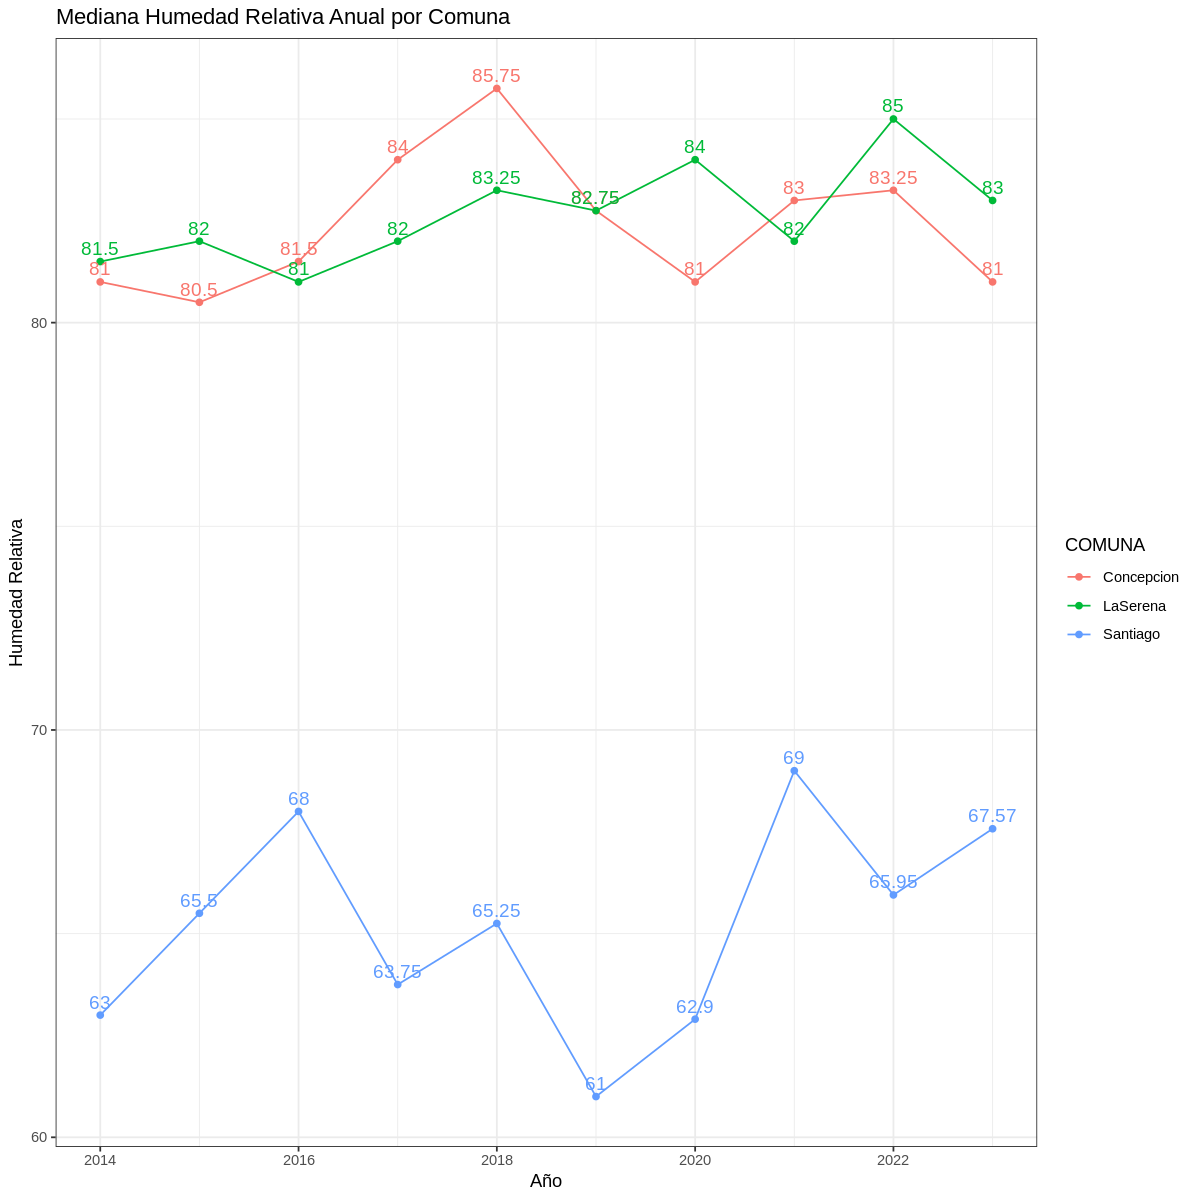

In [61]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_HR = median(Mediana_HR_Valor, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = mediana_HR, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_HR, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "Humedad Relativa", title = "Mediana Humedad Relativa Anual por Comuna") +
  theme_bw()

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


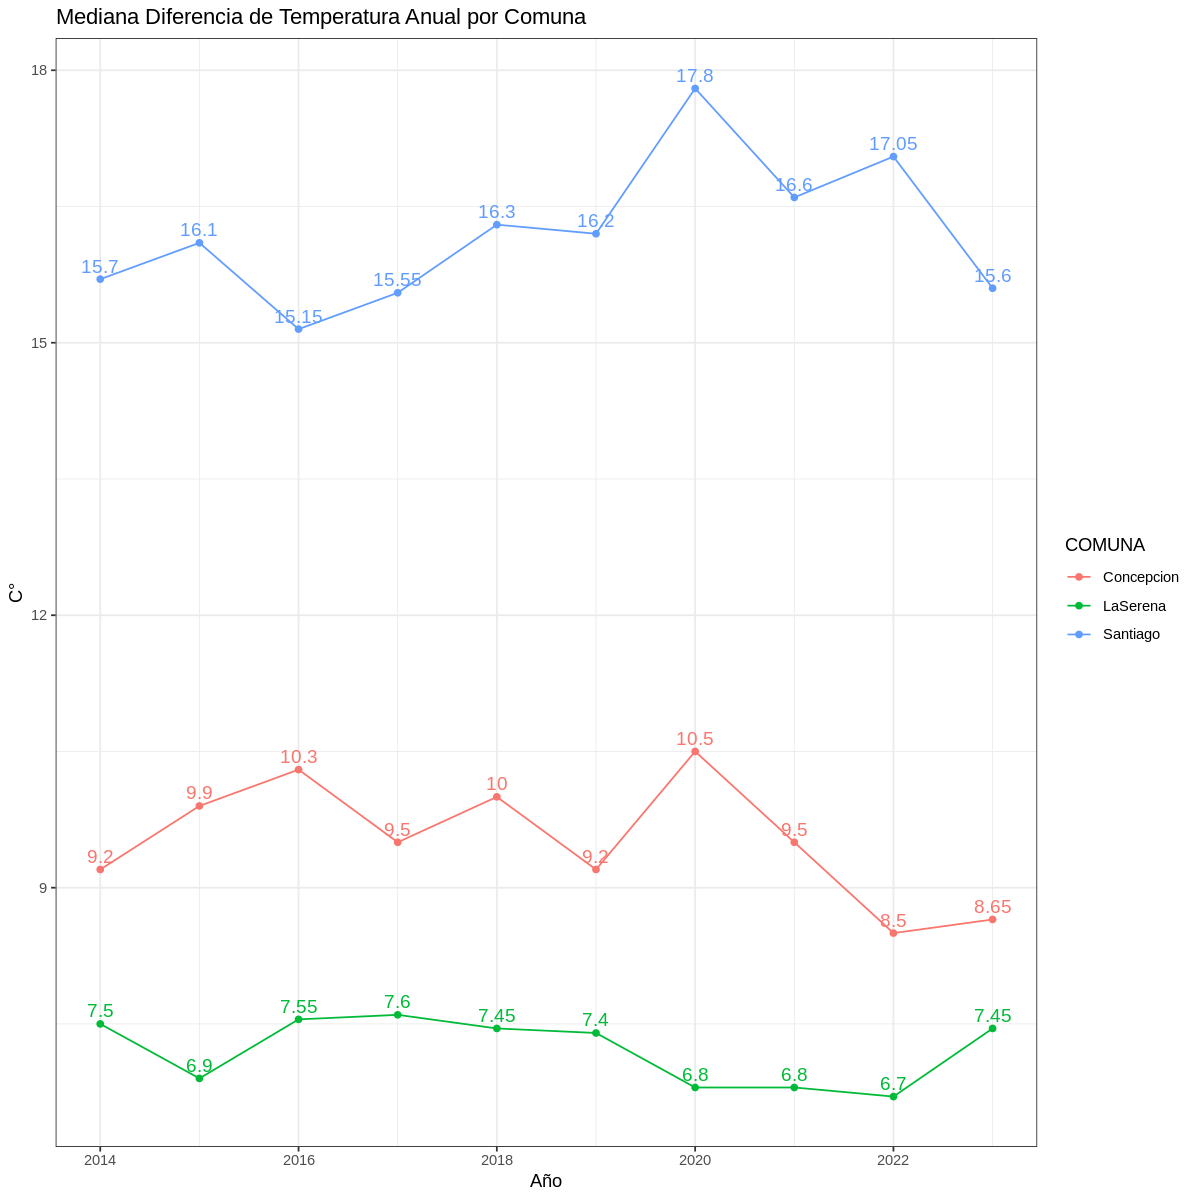

In [62]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(mediana_difMaxMin = median(difMaxMin, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = mediana_difMaxMin, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(mediana_difMaxMin, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "C°", title = "Mediana Diferencia de Temperatura Anual por Comuna") +
  theme_bw()

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


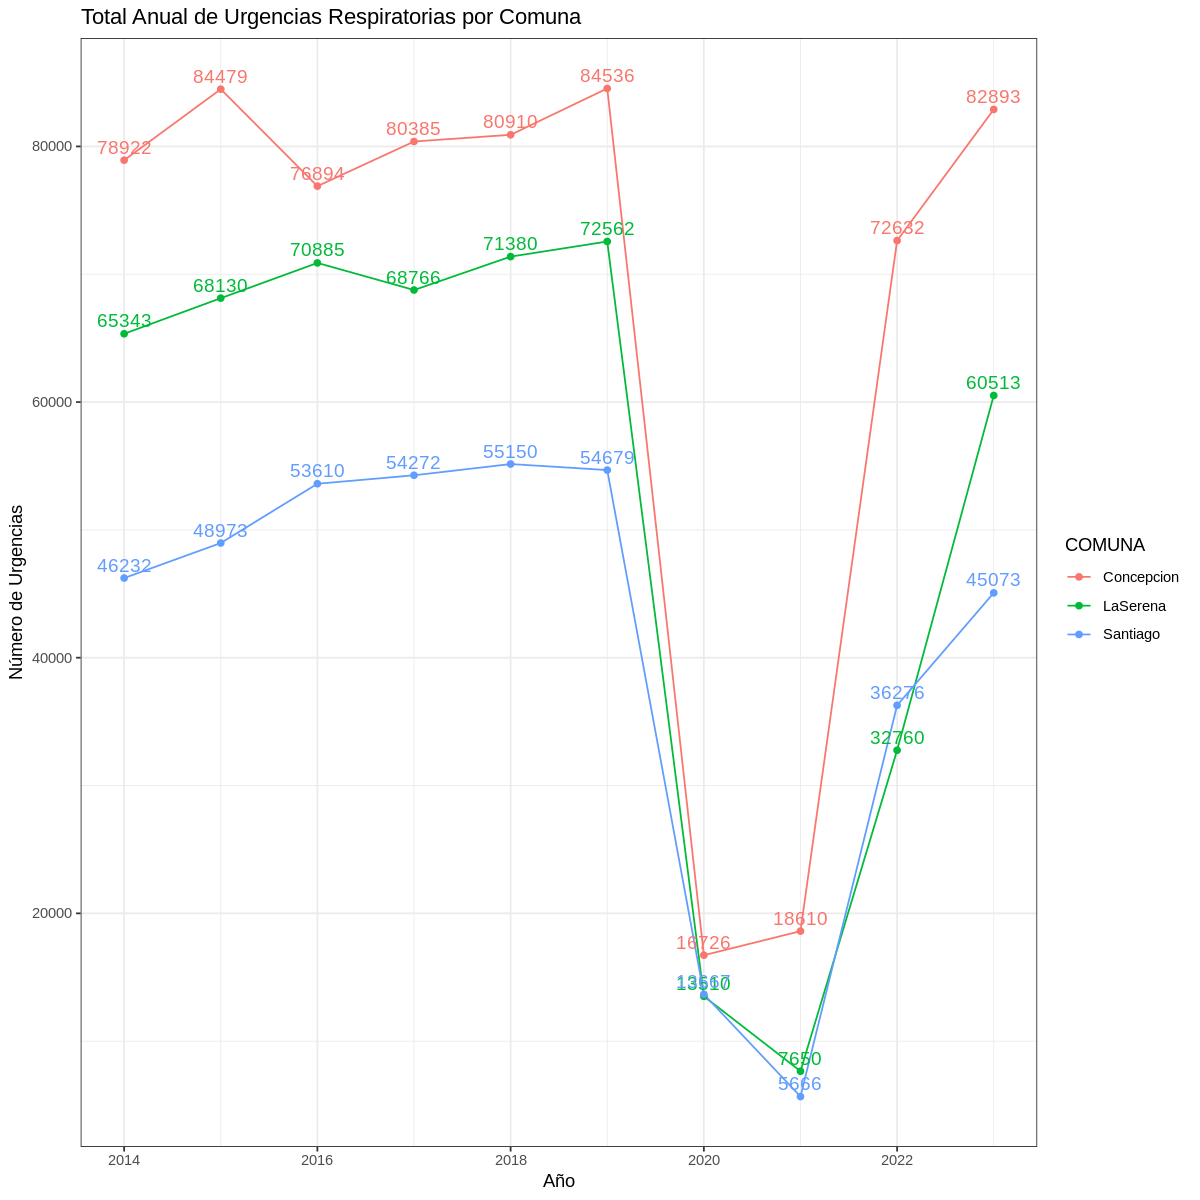

In [66]:
# Calculate the median of medianaClim for each year and COMUNA
df_medianas <- df_final %>%
  group_by(Anio, COMUNA) %>%
  summarise(anual_NumTotalUrg = sum(NumTotalUrg, na.rm = TRUE))

# Create the plot
ggplot(df_medianas, aes(x = Anio, y = anual_NumTotalUrg, color = COMUNA)) +
  geom_line() +
  geom_point() +
  geom_text(aes(label = paste0(round(anual_NumTotalUrg, 2))),  # Label with median value
            hjust = 0.5, vjust = -0.5, size = 4, show.legend = FALSE) + # Adjust label position and appearance
  labs(x = "Año", y = "Número de Urgencias", title = "Total Anual de Urgencias Respiratorias por Comuna") +
  theme_bw()

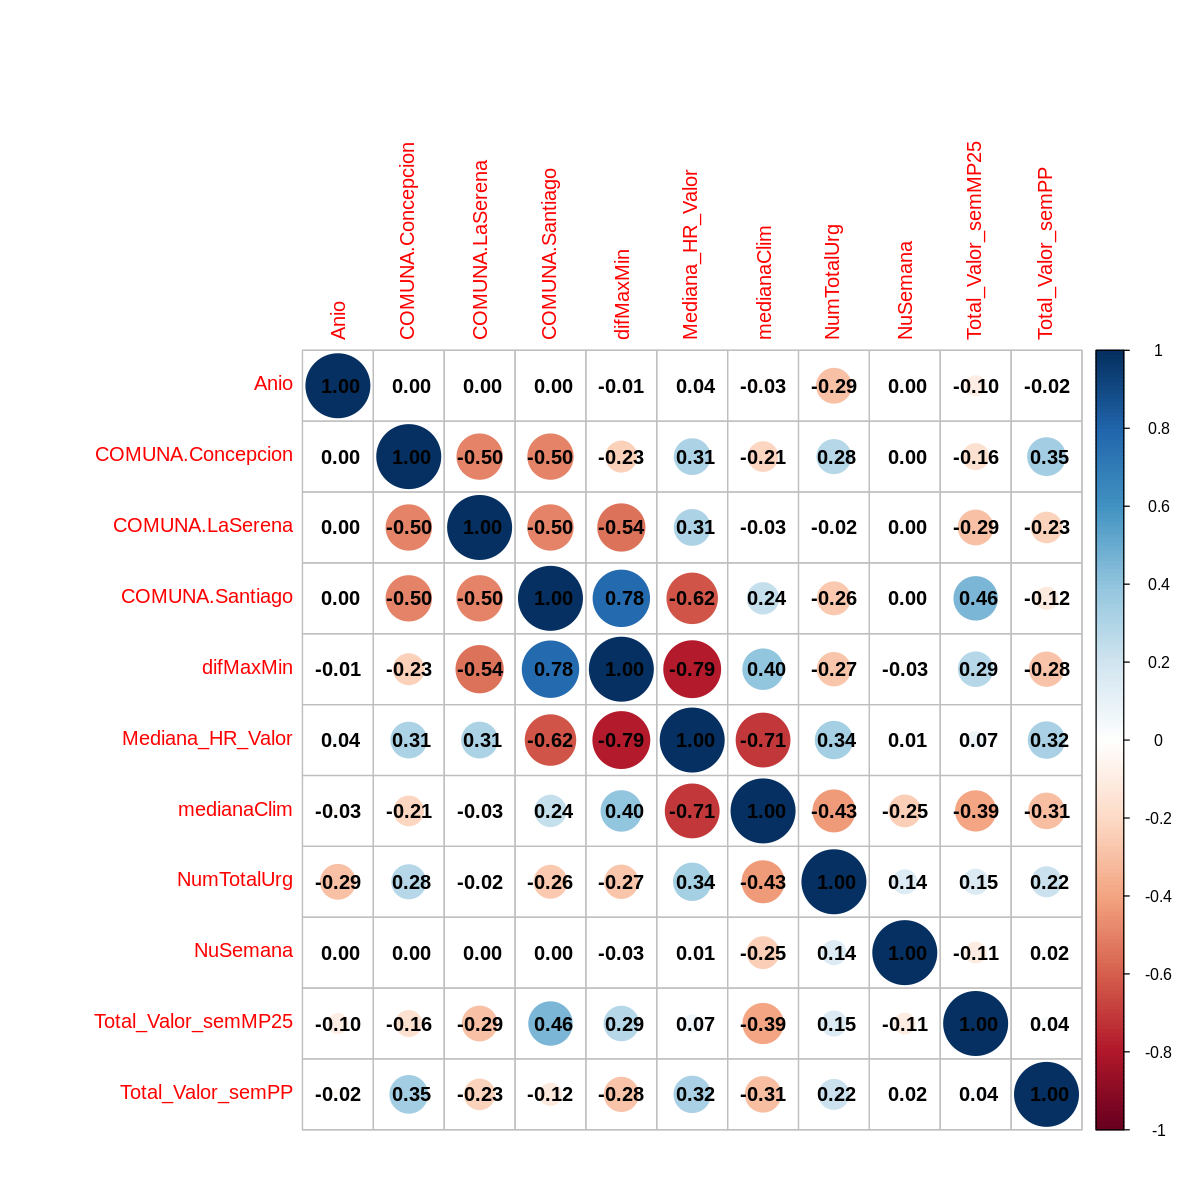

In [67]:
# Create dummy variables for COMUNA
dummies <- dummyVars(" ~ COMUNA", data = df_final)
df_with_dummies <- predict(dummies, newdata = df_final)
df_with_dummies <- data.frame(df_with_dummies)

# Combine with original data
df_for_cor <- cbind(df_final[, sapply(df_final, is.numeric)], df_with_dummies)

# Calculate correlation matrix
correlation_matrix <- cor(df_for_cor, use = "pairwise.complete.obs") # Handle missing values

# Plot correlation matrix
corrplot(correlation_matrix, method = 'circle', order = 'alphabet', addCoef.col ='black')

In [36]:
#Filtro el dataset par las regiones 8,4 y 13, tambien la causa 3 que es solo totalizador de urgencias reportadas
#df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & OrdenCausa != 3)
#count(df_urgr_esp_semanal)
#head(df_urgr_esp_semanal,5)
#df_urgr_esp_semanal %>% filter (ComunaGlosa == 'La Serena' & Anio == 2023 & SemanaEstadistica == 47) %>%arrange (Anio)
#%>% select(ComunaCodigo, ComunaGlosa) %>% filter(ComunaGlosa == 'Santiago')

In [37]:
#Obtengo el total de urgencias reportadas en todos los años por las 3 regiones.
df_final%>% filter(COMUNA =='LaSerena')%>%group_by(Anio) %>% summarise(Total = sum(NumTotalUrg, na.rm = TRUE))

Anio,Total
<dbl>,<int>
2014,65343
2015,68130
2016,70885
2017,68766
2018,71380
2019,72562
2020,13510
2021,7650
2022,32760


In [38]:
str (df_final)

'data.frame':	1572 obs. of  9 variables:
 $ COMUNA             : Factor w/ 3 levels "Concepcion","LaSerena",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Anio               : num  2014 2014 2014 2014 2014 ...
 $ NuSemana           : num  1 10 11 12 13 14 15 16 17 18 ...
 $ medianaClim        : num  16.8 15.2 15.8 15.3 13.7 ...
 $ difMaxMin          : num  13.6 11.2 9.9 12 4.4 9.2 8.4 11.2 10.9 8.4 ...
 $ Mediana_HR_Valor   : num  58 76.5 80 72 81 84 86 73 90.5 93 ...
 $ Total_Valor_semPP  : num  0 0.4 12.8 0.8 52.8 0 5.8 0 1.6 79.4 ...
 $ Total_Valor_semMP25: num  48.2 21.4 47.9 86.3 112.4 ...
 $ NumTotalUrg        : int  574 938 1270 1702 1450 1480 1317 1353 1400 1215 ...


In [39]:
# Grafico la cantidad de casos por región
#df_plot1<-df_urgr_esp_semanal%>% group_by(RegionGlosa) %>% summarise(Total = sum(NumTotal, na.rm = TRUE))
#options(repr.plot.width = 10, repr.plot.height = 10)
#ggplot(df_plot1, aes(x=RegionGlosa, y= Total, fill= RegionGlosa)) + geom_bar(stat="identity") +
#scale_y_continuous(labels = scales::comma_format(accuracy = 1))+
#theme(axis.text.x = element_text(angle = 75, vjust = .5))+
#labs(x = "Región", y = "Total Urgencias", title = "Total Urgencias x Región")

In [40]:
# Obtengo cantidad de urgencias por año y region
#df_resumen <- df_urgr_esp_semanal %>%
#  group_by(Anio, RegionGlosa) %>%
#  summarise(Total = sum(NumTotal, na.rm = TRUE))
#  df_resumen

In [41]:
# Obtengo cantidad de urgencias por año, semana y region.
#df_resumen <- df_urgr_esp_semanal %>%
#  group_by(Anio, SemanaEstadistica, Causa) %>%
#  summarise(Total = sum(NumTotal, na.rm = TRUE))
#  df_resumen

In [42]:
# Defino caracteristicas y objetivo a predecir
#features <- df_final[, -which(names(df_final) == "NumTotalUrg")]
#target <- df_final$NumTotalUrg

# Separo datos
set.seed(123)
train_index <- createDataPartition(target, p = 0.8, list = FALSE)
train_data <- features[train_index, ]
train_labels <- target[train_index]
test_data <- features[-train_index, ]
test_labels <- target[-train_index]

#set.seed(123) # para reproducibilidad
#index_train <- createDataPartition(df_final$NumTotalUrg, p = 0.7, list = FALSE)

#train_data <- df_final[index_train, ]
#remaining_data <- df_final[-index_train, ]

#index_val <- createDataPartition(remaining_data$NumTotalUrg, p = 0.5, list = FALSE)

#val_data <- remaining_data[index_val, ]
#test_data <- remaining_data[-index_val, ]

ERROR: Error: object 'target' not found


In [ ]:
# Set up training control
train_control <- trainControl(method = "cv", number = 5)  # 5-fold cross-validation

In [ ]:
# Define tuning grid (optional)
tune_grid <- expand.grid(depth = 10,
                    learning_rate = 0.1,
                    iterations = 200,
                    l2_leaf_reg = 0.1,
                    rsm = 0.95,
                    border_count = 64) # Adjust as needed

# Train the model
model <- train(x = train_data,
              y = train_labels,
              method = catboost.caret,
              logging_level = 'Silent',
              trControl = train_control,
              tuneGrid = tune_grid)  # Include if using a tuning grid

In [ ]:
# Make predictions
predictions <- predict(model, test_data)

# Evaluate the model (e.g., using RMSE)
rmse <- sqrt(mean((predictions - test_labels)^2))
print(paste("RMSE:", rmse))

#head (predictions, type ='prob')
print(model)
importance <- varImp(model, scale = FALSE)
print(importance)

#head (predictions, type ='prob',3150)

In [ ]:
head(test_labels,313)


In [ ]:
# Variables predictoras (todas excepto NumTotalUrg)
predictoras <- df_final[, -which(names(df_final) == "NumTotalUrg")]

# Variable objetivo
objetivo <- df_final$NumTotalUrg

In [ ]:
# Crea una partición aleatoria del 80% para entrenamiento
set.seed(123)  # Para reproducibilidad
indice_entrenamiento <- createDataPartition(objetivo, p = 0.8, list = FALSE)

# Crea los conjuntos de datos
datos_entrenamiento <- predictoras[indice_entrenamiento, ]
etiquetas_entrenamiento <- objetivo[indice_entrenamiento]
datos_prueba <- predictoras[-indice_entrenamiento, ]
etiquetas_prueba <- objetivo[-indice_entrenamiento]

In [ ]:
# Usa validación cruzada de 5 pliegues
control_entrenamiento <- trainControl(method = "cv", number = 5)

In [ ]:
# Entrena el modelo usando la función train() de caret
modelo_lineal <- train(x = datos_entrenamiento,
                       y = etiquetas_entrenamiento,
                       method = "lm",  # Especifica el método de regresión lineal
                       trControl = control_entrenamiento)

In [ ]:
print(modelo_lineal)  # Muestra información del modelo, incluyendo R-squared

In [ ]:
predicciones_entrenamiento <- predict(modelo_lineal, newdata = datos_entrenamiento)

In [ ]:
# Calcula el R-squared
# Primero, obtén las predicciones para los datos de entrenamiento
r_cuadrado <- cor(predicciones_entrenamiento, etiquetas_entrenamiento)^2
print(paste("R-squared:", r_cuadrado))
# Calcula el RMSE
rmse <- sqrt(mean((predicciones_entrenamiento - etiquetas_prueba)^2))
print(paste("RMSE:", rmse))

In [ ]:
head(etiquetas_entrenamiento,10)
round(head(predicciones_entrenamiento,10),1)

In [ ]:
# Create dummy variables
dummies <- dummyVars(" ~ COMUNA", data = df_final)
df_with_dummies <- predict(dummies, newdata = df_final)

# Convert to dataframe
df_with_dummies <- data.frame(df_with_dummies)

# Combine with original dataframe
df_final_dummied <- cbind(df_final, df_with_dummies)

# (Optional) Remove original COMUNA column
 df_final_dummied <- df_final_dummied[, -which(names(df_final_dummied) == "COMUNA")]


In [ ]:
df_final_dummied

In [ ]:
# Variables predictoras (todas excepto NumTotalUrg)
predictoras <- df_final_dummied[, -which(names(df_final_dummied) == "NumTotalUrg")]

# Variable objetivo
objetivo <- df_final_dummied$NumTotalUrg

# Crea una partición aleatoria del 80% para entrenamiento
set.seed(123)  # Para reproducibilidad
indice_entrenamiento <- createDataPartition(objetivo, p = 0.8, list = FALSE)

# Crea los conjuntos de datos
datos_entrenamiento <- predictoras[indice_entrenamiento, ]
etiquetas_entrenamiento <- objetivo[indice_entrenamiento]
datos_prueba <- predictoras[-indice_entrenamiento, ]
etiquetas_prueba <- objetivo[-indice_entrenamiento]

# Usa validación cruzada de 5 pliegues
control_entrenamiento <- trainControl(method = "cv", number = 5)
# Entrena el modelo usando la función train() de caret
modelo_lineal <- train(x = datos_entrenamiento,
                       y = etiquetas_entrenamiento,
                       method = "lm",  # Especifica el método de regresión lineal
                       trControl = control_entrenamiento)


print(modelo_lineal)  # Muestra información del modelo, incluyendo R-squared

In [ ]:
set.seed(123) # for reproducibility
   index_train <- createDataPartition(df_final_dummied$NumTotalUrg, p = 0.7, list = FALSE) #Splitting data into 70%, 30%

   train_data <- df_final_dummied[index_train, ] # 70% for training
   remaining_data <- df_final_dummied[-index_train, ] # 30% for validation and test

   index_val <- createDataPartition(remaining_data$NumTotalUrg, p = 0.5, list = FALSE) # 50% of the 30% (15% of the original) for validation

   val_data <- remaining_data[index_val, ]
   test_data <- remaining_data[-index_val, ]

#Reasoning: We split the data into three parts: training (70%), validation (15%), and test (15%). This allows us to tune the model using the validation set and then evaluate its performance on the unseen test set.

   train_control <- trainControl(method = "cv", number = 5)  # 5-fold cross-validation
   model <- train(NumTotalUrg ~ ., data = train_data, method = "lm", trControl = train_control)

#Reasoning: Here, we train a linear regression model (lm) using the training data. We use 5-fold cross-validation (trainControl) to estimate the model's performance and prevent overfitting.


   predictions <- predict(model, newdata = val_data) #Making predictions on validation dataset
   rmse <- sqrt(mean((predictions - val_data$NumTotalUrg)^2))  # Calculate RMSE
   print(paste("RMSE on Validation Set:", rmse))

   predictions_test <- predict(model, newdata = test_data) #Making predictions on the test dataset
   rmse_test <- sqrt(mean((predictions_test - test_data$NumTotalUrg)^2))  # Calculate RMSE
   print(paste("RMSE on Test Set:", rmse_test))

   #Reasoning: We make predictions on the validation and test data and evaluate the model's performance using Root Mean Squared Error (RMSE).
   print(model)

In [ ]:
set.seed(123)  # Para reproducibilidad

# 1. Dividir en entrenamiento y el resto (para validación y prueba)
train_index <- createDataPartition(target, p = 0.7, list = FALSE) # 70% para entrenamiento
train_data <- features[train_index, ]
train_labels <- target[train_index]
remaining_data <- features[-train_index, ] # 30% restante
remaining_labels <- target[-train_index]

# 2. Dividir el resto en validación y prueba (50% cada uno)
val_index <- createDataPartition(remaining_labels, p = 0.5, list = FALSE) # 15% del total para validación
val_data <- remaining_data[val_index, ]
val_labels <- remaining_labels[val_index]
test_data <- remaining_data[-val_index, ] # 15% del total para prueba
test_labels <- remaining_labels[-val_index]

# Set up training control
train_control <- trainControl(method = "cv", number = 5)  # 5-fold cross-validation

# Define tuning grid (optional)
tune_grid <- expand.grid(depth = 10,
                    learning_rate = 0.1,
                    iterations = 200,
                    l2_leaf_reg = 0.1,
                    rsm = 0.95,
                    border_count = 64) # Adjust as needed

# Train the model
model <- train(x = train_data,
              y = train_labels,
              method = catboost.caret,
              logging_level = 'Silent',
              trControl = train_control,
              tuneGrid = tune_grid)  # Include if using a tuning grid

# Make predictions
predictions <- predict(model, val_data)

# Evaluate the model (e.g., using RMSE)
rmse <- sqrt(mean((predictions - val_labels)^2))
print(paste("RMSE:", rmse))

#head (predictions, type ='prob')
print(model)
importance <- varImp(model, scale = FALSE)
print(importance)

In [ ]:
predictions2 <- predict(model, val_data)

# Evaluate the model (e.g., using RMSE)
rmse <- sqrt(mean((predictions2 - val_labels)^2))
print(paste("RMSE:", rmse))



# 2. Calcular el R cuadrado (manualmente):
SSR <- sum((val_labels - predictions2)^2)  # Suma de cuadrados de los residuos
SST <- sum((val_labels - mean(val_labels))^2)  # Suma total de cuadrados
R_squared_pred <- 1 - (SSR / SST)  # R cuadrado de la predicción

# 3. Imprimir el R cuadrado de la predicción:
print(paste("R cuadrado de la predicción:", R_squared_pred))